In [81]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [82]:
# Get the training features (X)
df_features_train = pd.read_csv("./files/train_inputs.csv")
df_features_train.head()

,0.000000000000000000e+00,0.000000000000000000e+00.1,1.000000000000000000e+01,0.000000000000000000e+00.2,1.400000000000000000e+01,2.000000000000000000e+00,0.000000000000000000e+00.3,0.000000000000000000e+00.4,4.000000000000000000e+00,2.000000000000000000e+00.1,...,0.000000000000000000e+00.24,0.000000000000000000e+00.25,0.000000000000000000e+00.26,2.000000000000000000e+00.9,2.000000000000000000e+00.10,0.000000000000000000e+00.27,3.000000000000000000e+00.1,7.000000000000000000e+00.1,2.000000000000000000e+00.11,2.000000000000000000e+00.12
0,0.0,0.0,9.0,16.0,16.0,16.0,0.0,1.0,0.0,0.0,...,4.0,0.0,4.0,0.0,14.0,13.0,9.0,4.0,0.0,14.0
1,10.0,15.0,16.0,10.0,16.0,16.0,0.0,1.0,16.0,12.0,...,16.0,16.0,1.0,16.0,16.0,7.0,14.0,14.0,16.0,1.0
2,1.0,2.0,0.0,6.0,0.0,2.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
3,2.0,7.0,0.0,14.0,16.0,0.0,0.0,1.0,0.0,1.0,...,15.0,0.0,0.0,3.0,1.0,7.0,0.0,8.0,0.0,1.0
4,2.0,0.0,0.0,12.0,12.0,2.0,0.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,15.0,14.0,15.0,15.0,0.0


In [83]:
# get the training target (Y)
df_target_train = pd.read_csv("./files/train_labels.csv")
df_target_train.head()

,6.000000000000000000e+00
0,5.0
1,6.0
2,5.0
3,6.0
4,6.0


In [84]:
# get the testing features
df_features_test = pd.read_csv("./files/test_inputs.csv")
df_features_test.head()

,1.000000000000000000e+00,1.000000000000000000e+00.1,0.000000000000000000e+00,3.000000000000000000e+00,1.200000000000000000e+01,1.200000000000000000e+01.1,2.000000000000000000e+00,1.000000000000000000e+00.2,2.000000000000000000e+00.1,8.000000000000000000e+00,...,1.600000000000000000e+01,0.000000000000000000e+00.10,1.000000000000000000e+00.6,0.000000000000000000e+00.11,4.000000000000000000e+00.5,0.000000000000000000e+00.12,1.300000000000000000e+01.1,1.000000000000000000e+00.7,1.300000000000000000e+01.2,0.000000000000000000e+00.13
0,2.0,2.0,2.0,1.0,2.0,8.0,0.0,2.0,0.0,1.0,...,15.0,2.0,0.0,0.0,1.0,0.0,0.0,12.0,12.0,0.0
1,16.0,12.0,5.0,16.0,14.0,14.0,15.0,16.0,16.0,14.0,...,13.0,16.0,16.0,15.0,16.0,16.0,15.0,16.0,16.0,0.0
2,0.0,2.0,5.0,16.0,4.0,4.0,2.0,1.0,0.0,1.0,...,13.0,1.0,0.0,1.0,0.0,8.0,9.0,0.0,0.0,0.0
3,0.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,1.0,0.0,11.0,16.0,11.0,0.0,1.0
4,16.0,13.0,16.0,16.0,16.0,16.0,15.0,14.0,16.0,16.0,...,14.0,9.0,16.0,15.0,15.0,16.0,16.0,15.0,16.0,16.0


In [85]:
# get the testing targets
df_target_test = pd.read_csv("./files/test_labels.csv")
df_target_test.head()

,6.000000000000000000e+00
0,6.0
1,5.0
2,6.0
3,6.0
4,6.0


## How we will approach creating the K-NN algorithm
- calculate the distance between the new data point to everyother data point
- see which distance was the smallest between compared to all the points
- classifiy the test with the target value of the data point with the smallest distance

### Using 1-NN 
- Here we only need to keep track of the smallest distance and use the target value  
  of the smallest distance to classify the data point as either 5 or 6.



In [86]:
# where x_test is the test vector
# where x_train is the feature vector

def distance(x_train, x_test):
    return np.sqrt(np.sum((x_train - x_test) ** 2, axis=1))



In [87]:
def predict(x_test, x_train, y_train, k):
    
    x_train = np.array(x_train)  
    x_test = np.array(x_test).reshape(1, -1)  
    
    distance_array = distance(x_train, x_test)

    k_index = np.argsort(distance_array)[:k]
    k_nearest_label = y_train.iloc[k_index].values

    # Majority voting
    common = Counter(k_nearest_label).most_common(1)[0][0]

    return common



In [88]:
def one_NN(x_train, y_train, x_test, y_test, k):
    y_train_series = y_train.copy().squeeze()

    x_train_np = x_train.values
    x_test_np = x_test.values   

    predictions = [predict(x, x_train_np, y_train_series, k) for x in x_test_np]
    return np.array(predictions)

In [89]:
predictions1 = one_NN(df_features_train, df_target_train, df_features_test, df_target_test, 1)
print(predictions1)

[6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6.
 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 6. 5. 6. 5. 5. 6. 6. 5. 5. 6. 5. 6. 5. 6.
 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 6. 5. 5. 6. 5. 6. 5.
 5. 6. 5. 6. 5. 6. 6. 5. 6. 5. 6. 6. 5. 6. 6. 5. 6. 6. 5. 5. 6. 6. 6. 5.
 6. 5. 6. 6. 6. 6. 5. 6. 6. 5. 6. 5. 6.]


# Testing to make sure our alogirthm works

## Checking for how accurate our model is when K = 1

In [90]:
test_series = df_target_test.squeeze()
accuracy = np.sum(predictions1 == test_series) / len(predictions1)
print(accuracy)

0.6972477064220184


we can see that having a k value of 1 reduces the accuracy of the model.

## Testing our model with K=3

In [91]:
predictions2 = one_NN(df_features_train, df_target_train, df_features_test, df_target_test, 3)
print(predictions2)

[6. 5. 6. 6. 6. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6.
 6. 5. 5. 5. 5. 6. 5. 6. 5. 6. 6. 5. 6. 5. 5. 6. 6. 5. 5. 6. 5. 5. 6. 6.
 5. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6.
 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 5. 6. 5. 6.]


In [92]:
accuracy = np.sum(predictions2 == test_series) / len(predictions2)
print(accuracy)

0.7431192660550459


## Working with Cross Validation


In [93]:
def cross_val_knn(x_train, y_train, k, n_split=10):

    kf = KFold(n_splits=n_split, shuffle= True, random_state=42)
    accuracies = []

    for train_index, val_index in kf.split(x_train):

        x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        predictions = one_NN(x_train_fold, y_train_fold, x_val_fold, y_val_fold, k)

        accuracy = np.mean(predictions == y_val_fold.values)
        accuracies.append(accuracy)

        
    return np.mean(accuracies)


In [94]:
k_values = range(1,31)
cross_val_accuracy = []

for k in range(1,31):
    acc = cross_val_knn(df_features_train, df_target_train.squeeze(), k)
    cross_val_accuracy.append(acc)
    print(cross_val_accuracy)

best_k = k_values[np.argmax(cross_val_accuracy)]
best_accuracy = max(cross_val_accuracy)
print(f"Best k: {best_k}, Cross-validation accuracy: {best_accuracy:.4f}")



[np.float64(0.7437474747474748)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779), np.float64(0.7777474747474749)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779), np.float64(0.7777474747474749), np.float64(0.7897878787878787)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779), np.float64(0.7777474747474749), np.float64(0.7897878787878787), np.float64(0.7867878787878788)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779), np.float64(0.7777474747474749), np.float64(0.7897878787878787), np.float64(0.7867878787878788), np.float64(0.8008181818181818)]
[np.float64(0.7437474747474748), np.float64(0.7437474747474748), np.float64(0.7737777777777779), 

## Getting a visual on what the features look like

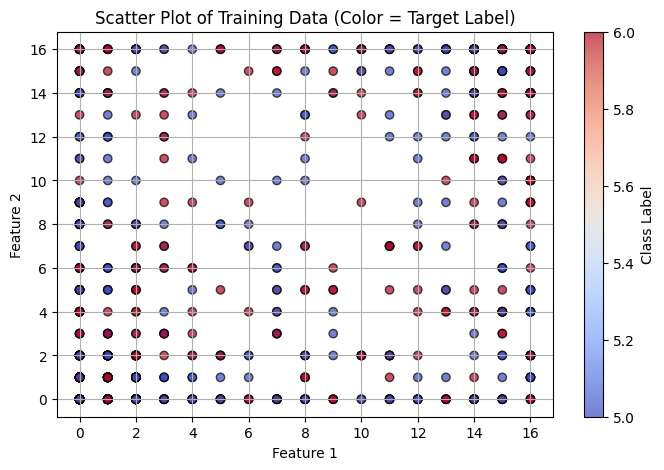

In [95]:
df_features_plot = df_features_train.iloc[:, [0, 1]]
df_target_plot = df_target_train.squeeze()  

plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_features_plot.iloc[:, 0], df_features_plot.iloc[:, 1], 
                       c=df_target_plot, cmap="coolwarm", edgecolors='k', alpha=0.7)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Training Data (Color = Target Label)")
plt.colorbar(label="Class Label")  
plt.grid(True)
plt.show()

## 1. A graph that shows the average accuracy based on 10-fold cross validation when varying the number of neighbours from 1 to 30.

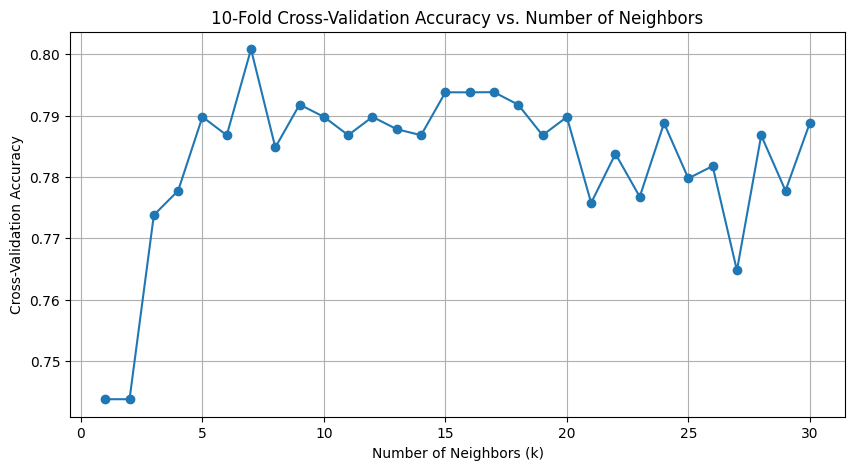

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, cross_val_accuracy, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("10-Fold Cross-Validation Accuracy vs. Number of Neighbors")
plt.grid(True)
plt.show()


## 2. The best number of neighbours found by 10-fold cross validation and its cross-validation accuracy.

In [97]:
print(f"Best k: {best_k}, Cross-validation accuracy: {best_accuracy:.4f}")

Best k: 7, Cross-validation accuracy: 0.8008


## 3. The test accuracy based on the best number of neighbours.

In [98]:
predictions3 = one_NN(df_features_train, df_target_train, df_features_test, df_target_test, best_k)
print(predictions3)

[6. 5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6. 6. 6. 5. 6. 6.
 6. 5. 5. 5. 5. 6. 5. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5. 5. 6. 6. 5. 6. 6. 6.
 5. 6. 6. 6. 6. 6. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6.
 5. 6. 5. 6. 5. 6. 6. 5. 6. 6. 5. 6. 5. 6. 6. 5. 6. 6. 6. 5. 6. 6. 6. 6.
 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6.]


In [99]:
accuracy = np.sum(predictions3 == test_series) / len(predictions3)
print(f'The K value used to test the model: {k_values}, This reulted in an acuraccy of: {accuracy}')

The K value used to test the model: range(1, 31), This reulted in an acuraccy of: 0.7798165137614679


What we have conducted from traininig and validating this model is that the most accurate K value is 7. 

When testing this on our data we get an accuracy of 0.7798 which is very good comapred to other K values tested from cross validation